In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate,GridSearchCV
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df=pd.read_csv('Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [5]:
df2=df.copy()
df=df.drop('Id',axis=1)

<AxesSubplot:xlabel='Area(total)', ylabel='Count'>

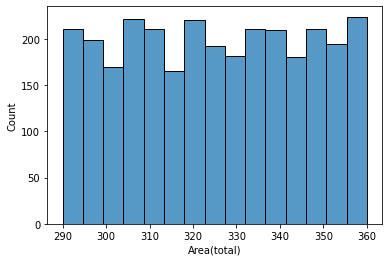

In [6]:
#Number of homes by area
sns.histplot(df,x='Area(total)')

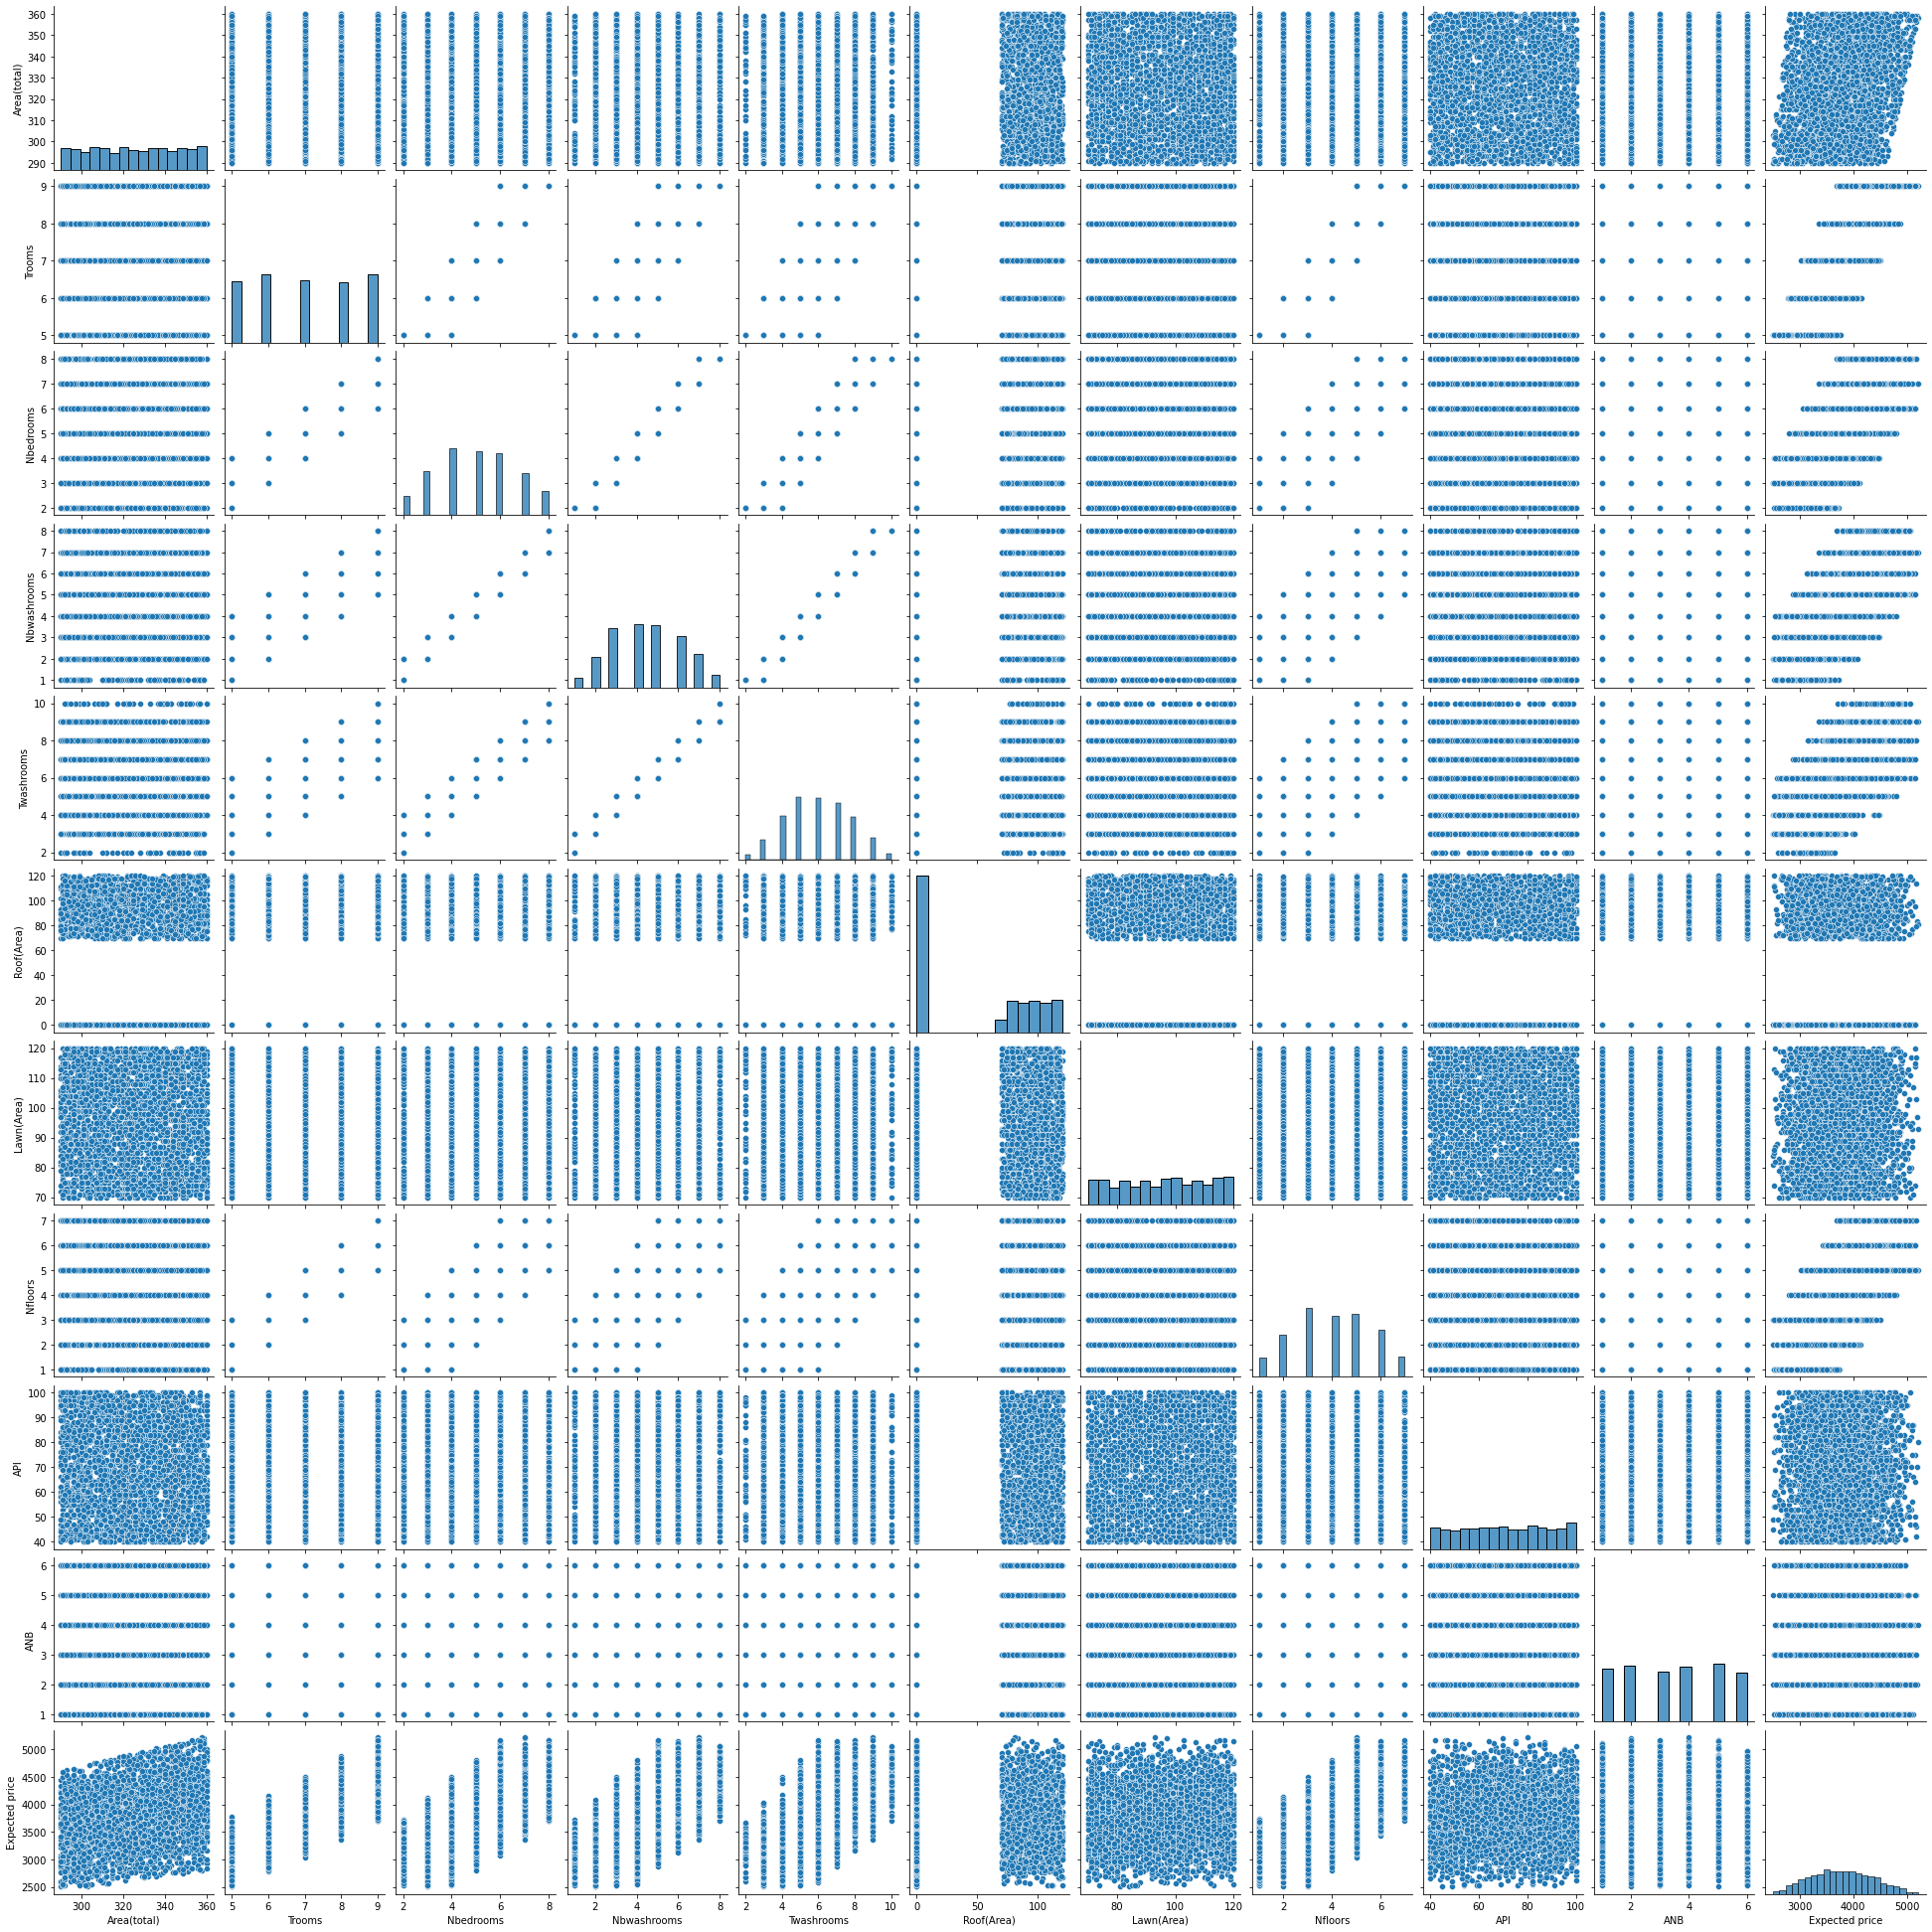

In [7]:
sns.pairplot(df)

Text(0.5, 1.0, 'Number of houses by roof and total area')

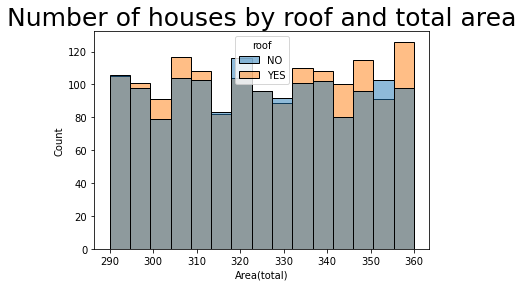

In [8]:
#Number of houses by roof and total area
sns.histplot(df,x='Area(total)',hue='roof').set_title('Number of houses by roof and total area',fontsize=25)

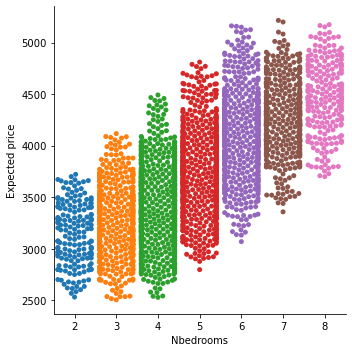

In [9]:
# Expected price by number of bedrooms
sns.catplot(data=df,x='Nbedrooms',y='Expected price',kind='swarm')

#### The minimum and maximum Expected Price increase as the number of bedrooms increase

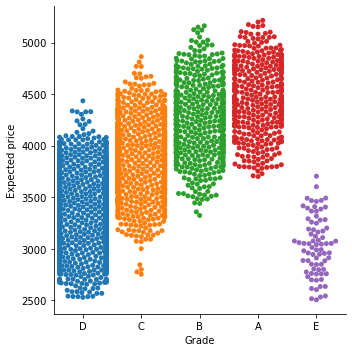

In [10]:
# Price variation by grade
sns.catplot(data=df,x='Grade',y='Expected price',kind='swarm')

<AxesSubplot:xlabel='API', ylabel='Count'>

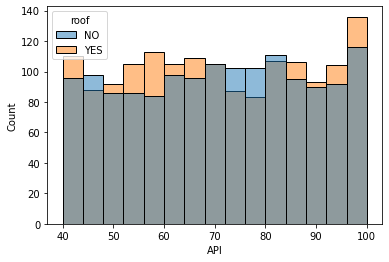

In [11]:
#Number of houses that have roofs by API
sns.histplot(df,x='API',hue='roof')

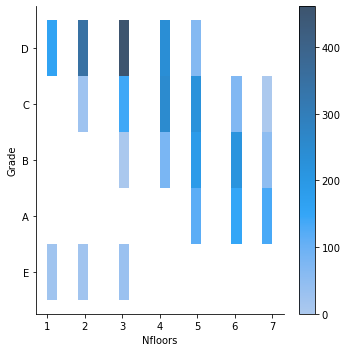

In [12]:
#Number of floors by grade
sns.displot(df,x='Nfloors',y='Grade',cbar=True)

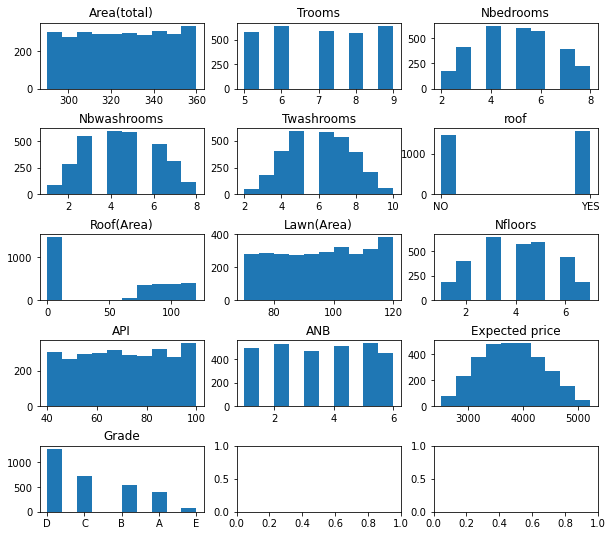

In [13]:
#Distribution of data in all columns
fig,ax=plt.subplots(5,3,figsize=(10,9))
for i in range(len((df.columns))):
    ax[i//3,i%3].hist(df[df.columns[i]])
    ax[i//3,i%3].set_title(df.columns[i])
fig.subplots_adjust(hspace=0.6,wspace=0.2)

In [14]:
# creation of lists of categorical and numerical variables
num=list(df.select_dtypes(include='int64').columns)
cat=list(df.select_dtypes(include='object').columns)

<AxesSubplot:title={'center':'Correlation matrix'}>

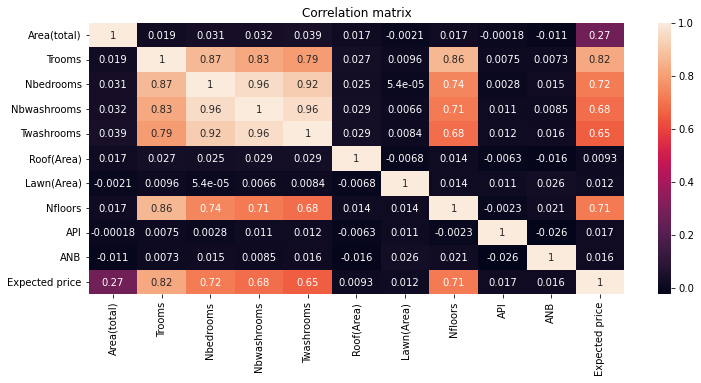

In [15]:
plt.figure(figsize=(12,5))
plt.title('Correlation matrix')
sns.heatmap(df.corr(),annot=True)

In [16]:
for i in cat:
    df[i]=preprocessing.LabelEncoder().fit_transform(df[i])

<AxesSubplot:title={'center':'Correlation matrix'}>

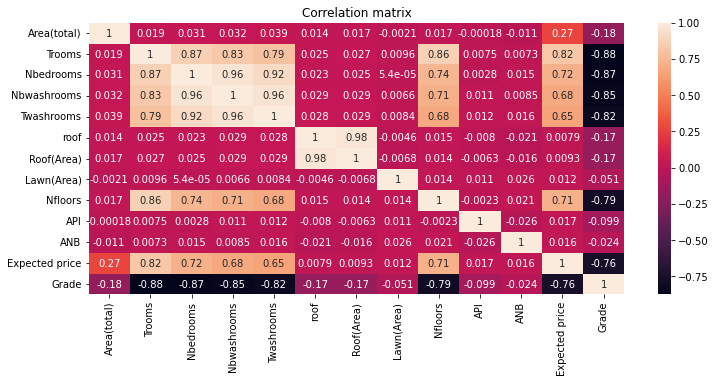

In [17]:
plt.figure(figsize=(12,5))
plt.title('Correlation matrix')
sns.heatmap(df.corr(),annot=True)

## Baseline Logistic Regression

In [18]:
X=df.drop('Grade',axis=1)
y=df['Grade']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)

In [20]:
log=LogisticRegression()

In [21]:
log.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred_log=log.predict(X_test)

In [23]:
log.score(X_test,y_test)

0.5716666666666667

In [24]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [43]:
print(confusion_matrix(y_test,y_pred_log))

[[ 35  28  19   0   0]
 [ 22  39  32   6   0]
 [ 11  28  45  57   0]
 [  2   8  29 224   0]
 [  0   0   2  13   0]]


In [25]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        82
           1       0.38      0.39      0.39        99
           2       0.35      0.32      0.34       141
           3       0.75      0.85      0.80       263
           4       0.00      0.00      0.00        15

    accuracy                           0.57       600
   macro avg       0.40      0.40      0.40       600
weighted avg       0.54      0.57      0.55       600



In [26]:
log.coef_

array([[-4.91453144e-02,  2.06548484e-03,  4.64932254e-03,
         5.34161129e-03,  5.12279257e-03,  1.39383806e-04,
         1.37395159e-02, -1.28888462e-02,  3.38554491e-03,
        -6.42819968e-03, -8.57254951e-04,  4.19965209e-03],
       [-2.36970370e-02,  2.17106898e-03,  2.10090202e-03,
         2.10848750e-03,  2.15848695e-03,  3.41760344e-05,
         3.89332763e-03, -6.82512439e-03,  2.61776603e-03,
         2.58752814e-03, -6.54595299e-04,  2.21581067e-03],
       [ 5.05896896e-03, -9.42981431e-05,  1.81860214e-04,
         1.81543574e-04,  5.51715023e-05,  5.75056974e-05,
         4.77357024e-03,  5.94236349e-04,  2.35651066e-04,
         2.88731275e-03,  7.88799701e-04, -2.21853718e-04],
       [ 3.41677834e-02, -3.70051149e-03, -5.79121948e-03,
        -6.27698591e-03, -6.12250569e-03, -3.57926339e-05,
        -2.65377950e-03,  1.06904868e-02, -5.36300759e-03,
         3.30077345e-03,  5.19114510e-04, -2.83892532e-03],
       [ 3.36155990e-02, -4.41744182e-04, -1.1408653

## Stacking with Logistic Regression using Support Vector Classifier and Decision Tree Classifier and Random Forest Classifier

In [27]:
model41=DecisionTreeClassifier()
model42=RandomForestClassifier(n_estimators=100,max_depth=5,n_jobs=-1,random_state=88,oob_score=True)
#model43=SVC()

In [28]:
model41.fit(X_train,y_train)
model42.fit(X_train,y_train)
#model43.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=88)

In [29]:
model41_train_pred = model41.predict(X_train)
model42_train_pred = model42.predict(X_train)
#model43_train_pred = model43.predict(X_train)

In [30]:
#model43.score(X_test,y_test)

In [31]:
model4_train_X = {'DTC':model41_train_pred,'RFC':model42_train_pred}#,'SVC':model43_train_pred}
model4_train_X = pd.DataFrame(model4_train_X)
model4_train_X # DataFrame that has outputs from Desicion Tree Classifier and Random Forest Classifier

,DTC,RFC
0,0,1
1,3,2
2,3,3
3,3,3
4,3,3
...,...,...
2395,2,2
2396,3,3
2397,0,0
2398,4,3


In [32]:
model41_test_pred = model41.predict(X_test)
model42_test_pred = model42.predict(X_test)
#model43_test_pred = model43.predict(X_test)

In [33]:
model4_test_X = {'DTC':model41_test_pred,'RFC':model42_test_pred}#,'SVC':model43_test_pred}
model4_test_X = pd.DataFrame(model4_test_X)
model4_test_X # DataFrame that has outputs from Desicion Tree Classifier and Random Forest Classifier

,DTC,RFC
0,2,2
1,3,3
2,3,2
3,3,3
4,2,2
...,...,...
595,2,2
596,2,2
597,1,1
598,3,3


In [34]:
model1=LogisticRegression()
model2=RandomForestClassifier(n_estimators=100,max_depth=5,n_jobs=-1,random_state=88,oob_score=True)
model3=ada = AdaBoostClassifier(n_estimators=10,learning_rate=1.0,random_state =88)
model4=LogisticRegression()

In [35]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(model4_train_X,y_train)

LogisticRegression()

In [36]:
print(model1.__class__.__name__,model1.score(X_train,y_train))
print(model2.__class__.__name__,model2.score(X_train,y_train))
print(model3.__class__.__name__,model3.score(X_train,y_train))
print('Model stacking using Logistic Regression with DTC and SVC',model4.score(model4_train_X,y_train))

LogisticRegression 0.5333333333333333
RandomForestClassifier 0.8633333333333333
AdaBoostClassifier 0.5875
Model stacking using Logistic Regression with DTC and SVC 1.0


In [37]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(model4_test_X)

In [38]:
print(model1.__class__.__name__,model1.score(X_test,y_test))
print(model2.__class__.__name__,model2.score(X_test,y_test))
print(model3.__class__.__name__,model3.score(X_test,y_test))
print('Model stacking using Logistic Regression with DTC and SVC',model4.score(model4_test_X,y_test))

LogisticRegression 0.5716666666666667
RandomForestClassifier 0.86
AdaBoostClassifier 0.59
Model stacking using Logistic Regression with DTC and SVC 0.8533333333333334


In [39]:
modelcomp={'Model_Name':[model1.__class__.__name__,model2.__class__.__name__,model3.__class__.__name__,'Stacking-Logistic(DTC,RFC)'],
           'Training_Score':[model1.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_train,y_train),model4.score(model4_train_X,y_train)],
          'Testing_Score':[model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test),model4.score(model4_test_X,y_test)]}

In [40]:
modelcompdf=pd.DataFrame(modelcomp)
modelcompdf # DataFrame that compares the performance of all models

,Model_Name,Training_Score,Testing_Score
0,LogisticRegression,0.533333,0.571667
1,RandomForestClassifier,0.863333,0.860000
2,AdaBoostClassifier,0.587500,0.590000
3,"Stacking-Logistic(DTC,RFC)",1.000000,0.853333
